In [1]:

import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense
#because of multiclass datasets
from keras.utils.np_utils import to_categorical 
import random

import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense
#because of multiclass datasets
from keras.utils.np_utils import to_categorical 
import random
from tensorflow.keras.optimizers import Adam

In [2]:
np.random.seed(0)

In [3]:
#import 60000 images from mnist data set
(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [4]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape[0])

(60000, 28, 28)
(10000, 28, 28)
60000


In [5]:
#look for the condition throw error otherwise
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal .."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal .."
assert(X_train.shape[1:] == (28, 28)), "The dimension of the images are not 28x28"
assert(X_test.shape[1:] == (28, 28)), "The dimension of the images are not 28x28"

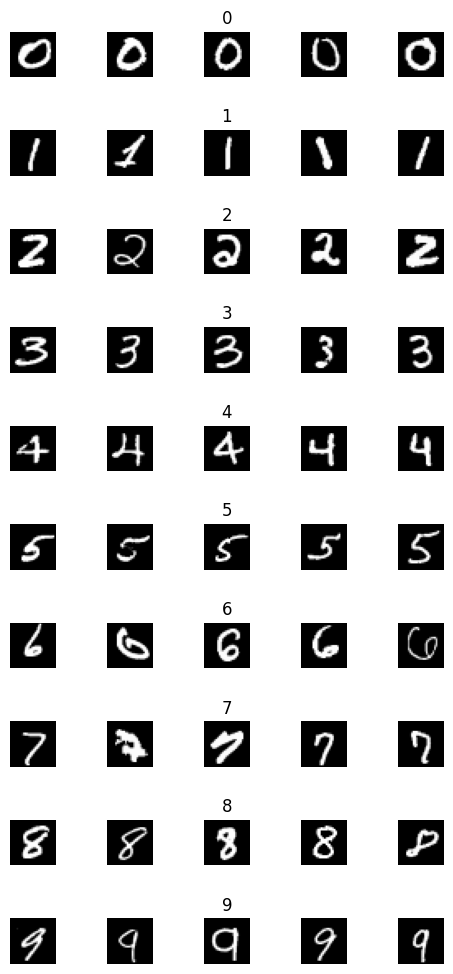

In [6]:
num_of_samples = []

cols = 5
num_of_classes = 10

fig, axs = plt.subplots(nrows=num_of_classes, ncols=cols,
                       figsize=(5, 10))
fig.tight_layout()
for i in range(cols):
  for j in range(num_of_classes):
    x_selected = X_train[y_train == j]
    axs[j][i].imshow(x_selected[random.randint(0, len(x_selected -1)),
                                :, :],
                    cmap=plt.get_cmap('gray'))
    axs[j][i].axis("off")
    if i==2:
      axs[j][i].set_title(str(j))
      num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of images')

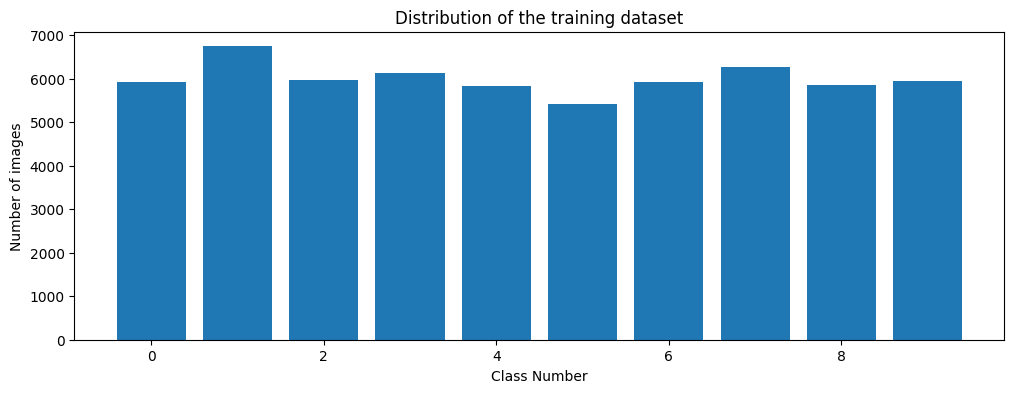

In [7]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_of_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class Number")
plt.ylabel("Number of images")

In [8]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10) 

In [9]:
#Each image has Intensity from 0 to 255
X_train = X_train/255 
X_test = X_test/255

In [10]:
#we must change the shape of the images to 1d array(28*28)
#for multipication 1*784
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0],
                         num_pixels)
X_test = X_test.reshape(X_test.shape[0],
                         num_pixels)
print(X_train.shape)

(60000, 784)


In [11]:
def create_model():
  model = Sequential()
  model.add(Dense(10, input_dim = num_pixels,
                  activation = 'relu'))
  model.add(Dense(30, activation='relu'))
  model.add(Dense(10, activation='relu'))
  model.add(Dense(num_of_classes, activation='softmax'))
  model.compile(Adam(lr=0.01),
                loss='categorical_crossentropy',
               metrics=['accuracy'])
  return model 

In [12]:
model = create_model()
print(model.summary())

history = model.fit(X_train, y_train, validation_split=0.1, epochs=10, batch_size=200, 
                    verbose=1, shuffle=1)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 30)                330       
                                                                 
 dense_2 (Dense)             (None, 10)                310       
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
Total params: 8,600
Trainable params: 8,600
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10


c:\Users\vande\MakeAIWork\MakeAIWork2\env\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


270/270 [==============================] - 1s 2ms/step - loss: 0.5096 - accuracy: 0.8402 - val_loss: 0.2267 - val_accuracy: 0.9340
Epoch 2/10
270/270 [==============================] - 0s 1ms/step - loss: 0.2722 - accuracy: 0.9187 - val_loss: 0.2022 - val_accuracy: 0.9430
Epoch 3/10
270/270 [==============================] - 0s 1ms/step - loss: 0.2390 - accuracy: 0.9285 - val_loss: 0.2047 - val_accuracy: 0.9390
Epoch 4/10
270/270 [==============================] - 0s 1ms/step - loss: 0.2249 - accuracy: 0.9337 - val_loss: 0.1827 - val_accuracy: 0.9482
Epoch 5/10
270/270 [==============================] - 0s 1ms/step - loss: 0.2136 - accuracy: 0.9366 - val_loss: 0.1717 - val_accuracy: 0.9510
Epoch 6/10
270/270 [==============================] - 0s 1ms/step - loss: 0.2046 - accuracy: 0.9388 - val_loss: 0.1981 - val_accuracy: 0.9465
Epoch 7/10
270/270 [==============================] - 0s 1ms/step - loss: 0.1971 - accuracy: 0.9407 - val_loss: 0.1716 - val_accuracy: 0.9532
Epoch 8/10
270/27

In [13]:
history = model.fit(X_train, y_train, validation_split=0.1,
         epochs=10, batch_size=200, verbose=1, shuffle=1)

Epoch 1/10
270/270 [==============================] - 0s 1ms/step - loss: 0.1838 - accuracy: 0.9444 - val_loss: 0.1779 - val_accuracy: 0.9505
Epoch 2/10
270/270 [==============================] - 0s 1ms/step - loss: 0.1759 - accuracy: 0.9473 - val_loss: 0.1735 - val_accuracy: 0.9528
Epoch 3/10
270/270 [==============================] - 0s 1ms/step - loss: 0.1759 - accuracy: 0.9473 - val_loss: 0.1765 - val_accuracy: 0.9520
Epoch 4/10
270/270 [==============================] - 0s 1ms/step - loss: 0.1725 - accuracy: 0.9487 - val_loss: 0.1690 - val_accuracy: 0.9515
Epoch 5/10
270/270 [==============================] - 0s 1ms/step - loss: 0.1711 - accuracy: 0.9489 - val_loss: 0.1837 - val_accuracy: 0.9472
Epoch 6/10
270/270 [==============================] - 0s 1ms/step - loss: 0.1675 - accuracy: 0.9496 - val_loss: 0.1919 - val_accuracy: 0.9475
Epoch 7/10
270/270 [==============================] - 0s 1ms/step - loss: 0.1680 - accuracy: 0.9488 - val_loss: 0.2049 - val_accuracy: 0.9417
Epoch 

Text(0.5, 0, 'epoch')

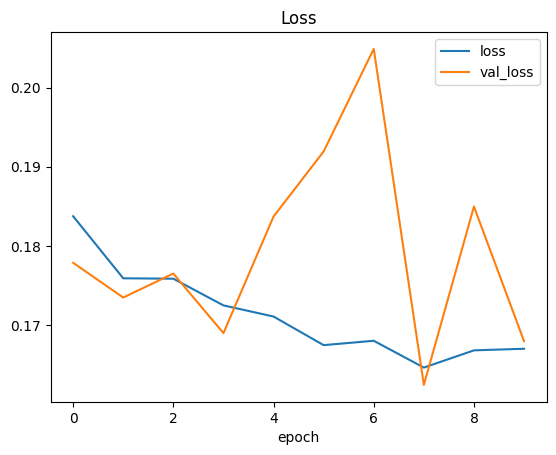

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

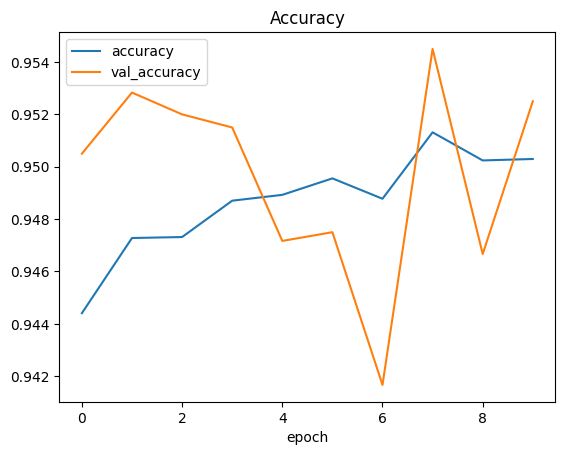

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [16]:
score = model.evaluate(X_test, y_test, verbose=0)
print(type(score))
print('Test Score:', score[0])
print('Test Accuracy:', score[1])

<class 'list'>
Test Score: 0.20718127489089966
Test Accuracy: 0.9426000118255615


In [25]:

import glob
from PIL import Image

#roses = list(data_dir.glob('roses/*'))


imagepath = 'twee' 

imgs_names = glob.glob(imagepath+ 'twee')

for imgname in imgs_names: 
    img = Image.open(imgname) 
    if img is None:     
        print(imgname)

plt.imshow(img)





NameError: name 'img' is not defined

In [ ]:
import cv2

img_array = np.asarray(img)
resized = cv2.resize(img_array, (28, 28 ))
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY) #(28, 28)
image = cv2.bitwise_not(gray_scale)

plt.imshow(image, cmap=plt.get_cmap('gray'))
print(image)

In [ ]:
image = image / 255
image = image.reshape(1, 784)

In [ ]:
prediction = model.predict_classes(image)
print("predicted digit:", str(prediction))